In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pylab as plt
import csv
import numpy.random as npr
import scipy.stats as scs
from scipy.stats import norm
%matplotlib inline

from datetime import datetime

### Loading of stocks datasets

In [2]:
slv = web.DataReader('SLV',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
t = web.DataReader('T',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
bep = web.DataReader('BEP',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
terp = web.DataReader('TERP',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
mfc = web.DataReader('MFC',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
jpm = web.DataReader('JPM',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
voya = web.DataReader('VOYA',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
qqq = web.DataReader('QQQ',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
aapl = web.DataReader('AAPL',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
baba = web.DataReader('BABA',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
spy = web.DataReader('SPY',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
gld = web.DataReader('GLD',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
twtr = web.DataReader('TWTR',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
msft = web.DataReader('MSFT',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
cmcsa = web.DataReader('CMCSA',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))
xle = web.DataReader('XLE',  'yahoo', datetime(1999,1,1), datetime(2019,1,1))

stockArr = [slv,t,bep,terp,mfc,jpm,voya,qqq,aapl,baba,spy,gld,twtr,msft,cmcsa,xle]
stockNames = ['SLV','T','BEP','TERP','MFC','JPM','VOYA','QQQ','AAPL','BABA','SPY','GLD','TWTR','MSFT','CMCSA','XLE']

In [3]:
slv.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-04-28,13.980,12.870,12.900,13.812,23432000.0,13.812
2006-05-01,14.179,13.750,13.920,13.870,14835000.0,13.870
2006-05-02,14.400,14.100,14.245,14.365,12511000.0,14.365
2006-05-03,14.464,13.413,14.450,13.925,15141000.0,13.925
2006-05-04,14.287,13.680,13.950,14.000,11075000.0,14.000


### Plotting graph of stocks

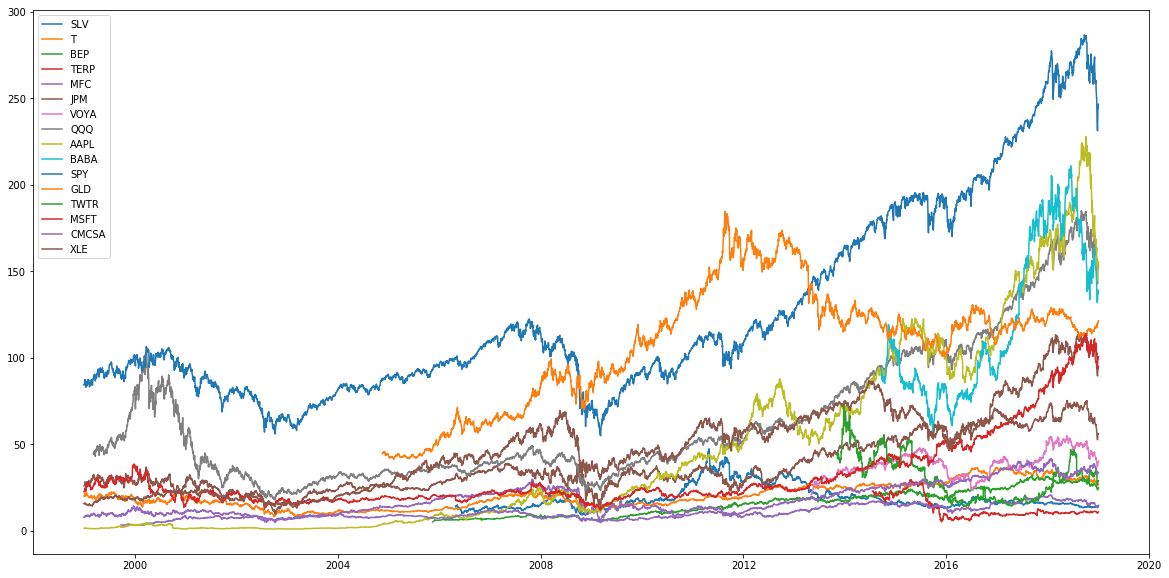

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(slv['Adj Close'], label='SLV');
plt.plot(t['Adj Close'], label = 'T');
plt.plot(bep['Adj Close'], label = 'BEP');
plt.plot(terp['Adj Close'], label = 'TERP');
plt.plot(mfc['Adj Close'], label = 'MFC');
plt.plot(jpm['Adj Close'], label = 'JPM');
plt.plot(voya['Adj Close'], label = 'VOYA');
plt.plot(qqq['Adj Close'], label = 'QQQ');
plt.plot(aapl['Adj Close'], label = 'AAPL');
plt.plot(baba['Adj Close'], label = 'BABA');
plt.plot(spy['Adj Close'], label = 'SPY');
plt.plot(gld['Adj Close'], label = 'GLD');
plt.plot(twtr['Adj Close'], label = 'TWTR');
plt.plot(msft['Adj Close'], label = 'MSFT');
plt.plot(cmcsa['Adj Close'], label = 'CMCSA');
plt.plot(xle['Adj Close'], label = 'XLE');

plt.legend(loc=2);

### Calculating Portfolio Value-at-Risk

In [5]:
def var_cov_var(P, c, mu, sigma):
    """
    Variance-Covariance calculation of daily Value-at-Risk
    using confidence level c, with mean of returns mu
    and standard deviation of returns sigma, on a portfolio
    of value P. Adapted from quantstart.com
    """
    alpha = scs.norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)

In [6]:
df_log_ret = pd.DataFrame({ 'SLV': np.log(slv['Adj Close']/slv['Adj Close'].shift(1)),
                 'T': np.log(t['Adj Close']/t['Adj Close'].shift(1)),
                 'BEP': np.log(bep['Adj Close']/bep['Adj Close'].shift(1)),
                 'TERP': np.log(terp['Adj Close']/terp['Adj Close'].shift(1)),
                 'MFC': np.log(mfc['Adj Close']/mfc['Adj Close'].shift(1)),
                 'JPM': np.log(jpm['Adj Close']/jpm['Adj Close'].shift(1)),
                 'VOYA': np.log(voya['Adj Close']/voya['Adj Close'].shift(1)),
                 'QQQ': np.log(qqq['Adj Close']/qqq['Adj Close'].shift(1)),
                 'AAPL': np.log(aapl['Adj Close']/aapl['Adj Close'].shift(1)),
                 'BABA': np.log(baba['Adj Close']/baba['Adj Close'].shift(1)),
                 'SPY': np.log(spy['Adj Close']/spy['Adj Close'].shift(1)),
                 'GLD': np.log(gld['Adj Close']/gld['Adj Close'].shift(1)),
                 'TWTR': np.log(twtr['Adj Close']/twtr['Adj Close'].shift(1)),
                 'MSFT': np.log(msft['Adj Close']/msft['Adj Close'].shift(1)),
                 'CMCSA': np.log(cmcsa['Adj Close']/cmcsa['Adj Close'].shift(1)),
                 'XLE': np.log(xle['Adj Close']/xle['Adj Close'].shift(1))})

df_pct_change = pd.DataFrame({ 'SLV': slv["Close"].pct_change(),
                 'T': t["Close"].pct_change(),
                 'BEP': bep["Close"].pct_change(),
                 'TERP': terp["Close"].pct_change(),
                 'MFC': mfc["Close"].pct_change(),
                 'JPM': jpm["Close"].pct_change(),
                 'VOYA': voya["Close"].pct_change(),
                 'QQQ': qqq["Close"].pct_change(),
                 'AAPL': aapl["Close"].pct_change(),
                 'BABA': baba["Close"].pct_change(),
                 'SPY': spy["Close"].pct_change(),
                 'GLD': gld["Close"].pct_change(),
                 'TWTR': twtr["Close"].pct_change(),
                 'MSFT': msft["Close"].pct_change(),
                 'CMCSA': cmcsa["Close"].pct_change(),
                 'XLE': xle["Close"].pct_change()})

df_pct_change_na = df_pct_change.dropna()
dfna = df_log_ret.dropna()

In [7]:
cov_P = dfna.cov()

Assigning weights to each stock to calculate value-at-risk of portfolio

In [8]:
k = np.random.rand(16)
w = np.asmatrix(k/sum(k))

In [9]:
p = np.asmatrix(np.mean(dfna))

In [10]:
mu_P = w * p.T
sigma_P = np.sqrt(w * np.asmatrix(cov_P) * w.T)

In [11]:
P = 600000 # the initial principal
c = .95 # confidence level
var = var_cov_var(P, c, mu_P, sigma_P)
print("Value-at-Risk at 95% confidence level:", var)

P = 600000 # the initial principal
c = .99 # confidence level
var = var_cov_var(P, c, mu_P, sigma_P)
print("Value-at-Risk at 99% confidence level:", var)

Value-at-Risk at 95% confidence level: [[9550.90415491]]
Value-at-Risk at 99% confidence level: [[13533.40579029]]


## Importing historical data from Federal Reserve

In [12]:
historical_data_int = pd.read_csv('C:/Users/Yean Keat/Documents/BT4016/Project/2019-historical-data/Historic_International.csv', date_parser=pd.Period)
historical_data_dom = pd.read_csv('C:/Users/Yean Keat/Documents/BT4016/Project/2019-historical-data/Historic_Domestic.csv', date_parser=pd.Period)

In [13]:
historical_data_int.head()

,Scenario Name,Date,Euro area real GDP growth,Euro area inflation,Euro area bilateral dollar exchange rate (USD/euro),Developing Asia real GDP growth,Developing Asia inflation,"Developing Asia bilateral dollar exchange rate (F/USD, index)",Japan real GDP growth,Japan inflation,Japan bilateral dollar exchange rate (yen/USD),U.K. real GDP growth,U.K. inflation,U.K. bilateral dollar exchange rate (USD/pound)
0,Actual,1976 Q1,6.7,NaN,NaN,NaN,NaN,NaN,3.4,9.4,299.6,6.6,14.9,1.916
1,Actual,1976 Q2,5.2,NaN,NaN,NaN,NaN,NaN,2.4,9.9,298.0,-0.7,9.5,1.785
2,Actual,1976 Q3,3.4,NaN,NaN,NaN,NaN,NaN,5.7,9.0,286.9,5.1,13.8,1.660
3,Actual,1976 Q4,6.6,NaN,NaN,NaN,NaN,NaN,0.5,9.5,293.1,8.7,21.6,1.701
4,Actual,1977 Q1,1.7,NaN,NaN,NaN,NaN,NaN,9.0,10.0,277.6,0.2,21.3,1.720


In [14]:
historical_data_dom.set_index('Date')

,Scenario Name,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
Date,,,,,,,,,,,,,,,,,
1976 Q1,Actual,9.3,14.0,4.9,9.6,7.7,4.7,4.9,7.4,7.6,9.4,8.9,6.8,NaN,23.4,50.9,NaN
1976 Q2,Actual,3.0,7.2,2.3,5.8,7.6,3.6,5.2,7.4,7.6,9.4,8.8,6.9,NaN,23.6,51.8,NaN
1976 Q3,Actual,2.2,7.6,3.2,9.6,7.7,6.5,5.2,7.3,7.6,9.1,9.0,7.1,NaN,24.5,52.6,NaN
1976 Q4,Actual,2.9,10.5,2.6,9.2,7.8,5.9,4.7,6.5,7.1,8.8,8.8,6.5,NaN,25.5,53.4,NaN
1977 Q1,Actual,4.8,11.7,0.9,8.4,7.5,7.5,4.6,6.8,7.2,8.8,8.7,6.3,NaN,26.5,55.0,NaN
1977 Q2,Actual,8.0,14.2,3.8,11.1,7.1,7.2,4.8,6.8,7.3,8.7,8.8,6.5,NaN,27.7,56.0,NaN
1977 Q3,Actual,7.4,12.7,5.7,12.2,6.9,5.6,5.5,7.0,7.3,8.6,8.9,6.9,NaN,28.7,57.3,NaN
1977 Q4,Actual,0.0,8.9,7.9,14.1,6.7,6.0,6.1,7.4,7.6,8.9,8.9,7.7,NaN,29.6,58.5,NaN
1978 Q1,Actual,1.3,7.3,3.2,10.1,6.3,7.1,6.4,7.8,8.0,9.0,9.1,8.0,NaN,30.7,59.7,NaN


In [15]:
historical_data_dom.corr()

,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
Real GDP growth,1.000000,0.814771,0.283024,0.300821,-0.053082,0.071424,0.088891,0.130313,0.116550,0.002085,0.055558,0.005203,-0.060149,-0.185031,-0.222249,-0.447768
Nominal GDP growth,0.814771,1.000000,0.195909,0.554024,0.055389,0.544029,0.480987,0.477137,0.457133,0.361360,0.415671,0.396897,-0.178951,-0.470757,-0.463521,-0.512810
Real disposable income growth,0.283024,0.195909,1.000000,0.764357,-0.069000,-0.111900,0.080027,0.112297,0.103775,0.061289,0.074163,0.046989,-0.016489,-0.094172,-0.102909,-0.077664
Nominal disposable income growth,0.300821,0.554024,0.764357,1.000000,0.051950,0.526153,0.503802,0.496374,0.481831,0.428973,0.458557,0.451645,-0.152852,-0.436618,-0.410226,-0.230882
Unemployment rate,-0.053082,0.055389,-0.069000,0.051950,1.000000,0.062535,0.097003,0.218077,0.287572,0.375301,0.308587,0.082081,-0.238798,-0.374669,-0.339574,0.147210
CPI inflation rate,0.071424,0.544029,-0.111900,0.526153,0.062535,1.000000,0.648890,0.569648,0.553078,0.520983,0.555459,0.629922,-0.299129,-0.493862,-0.455799,-0.316695
3-month Treasury rate,0.088891,0.480987,0.080027,0.503802,0.097003,0.648890,1.000000,0.962671,0.940394,0.907280,0.940036,0.981705,-0.631720,-0.738462,-0.668545,-0.127951
5-year Treasury yield,0.130313,0.477137,0.112297,0.496374,0.218077,0.569648,0.962671,1.000000,0.994714,0.958794,0.986459,0.930490,-0.756910,-0.810945,-0.742902,-0.128627
10-year Treasury yield,0.116550,0.457133,0.103775,0.481831,0.287572,0.553078,0.940394,0.994714,1.000000,0.971458,0.991247,0.908513,-0.829824,-0.827165,-0.763975,-0.083380
BBB corporate yield,0.002085,0.361360,0.061289,0.428973,0.375301,0.520983,0.907280,0.958794,0.971458,1.000000,0.981949,0.890338,-0.839543,-0.785527,-0.695467,0.235107


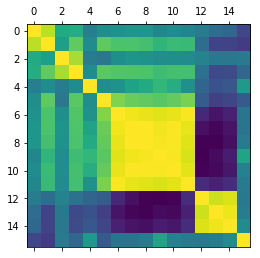

In [16]:
plt.matshow(historical_data_dom.corr());

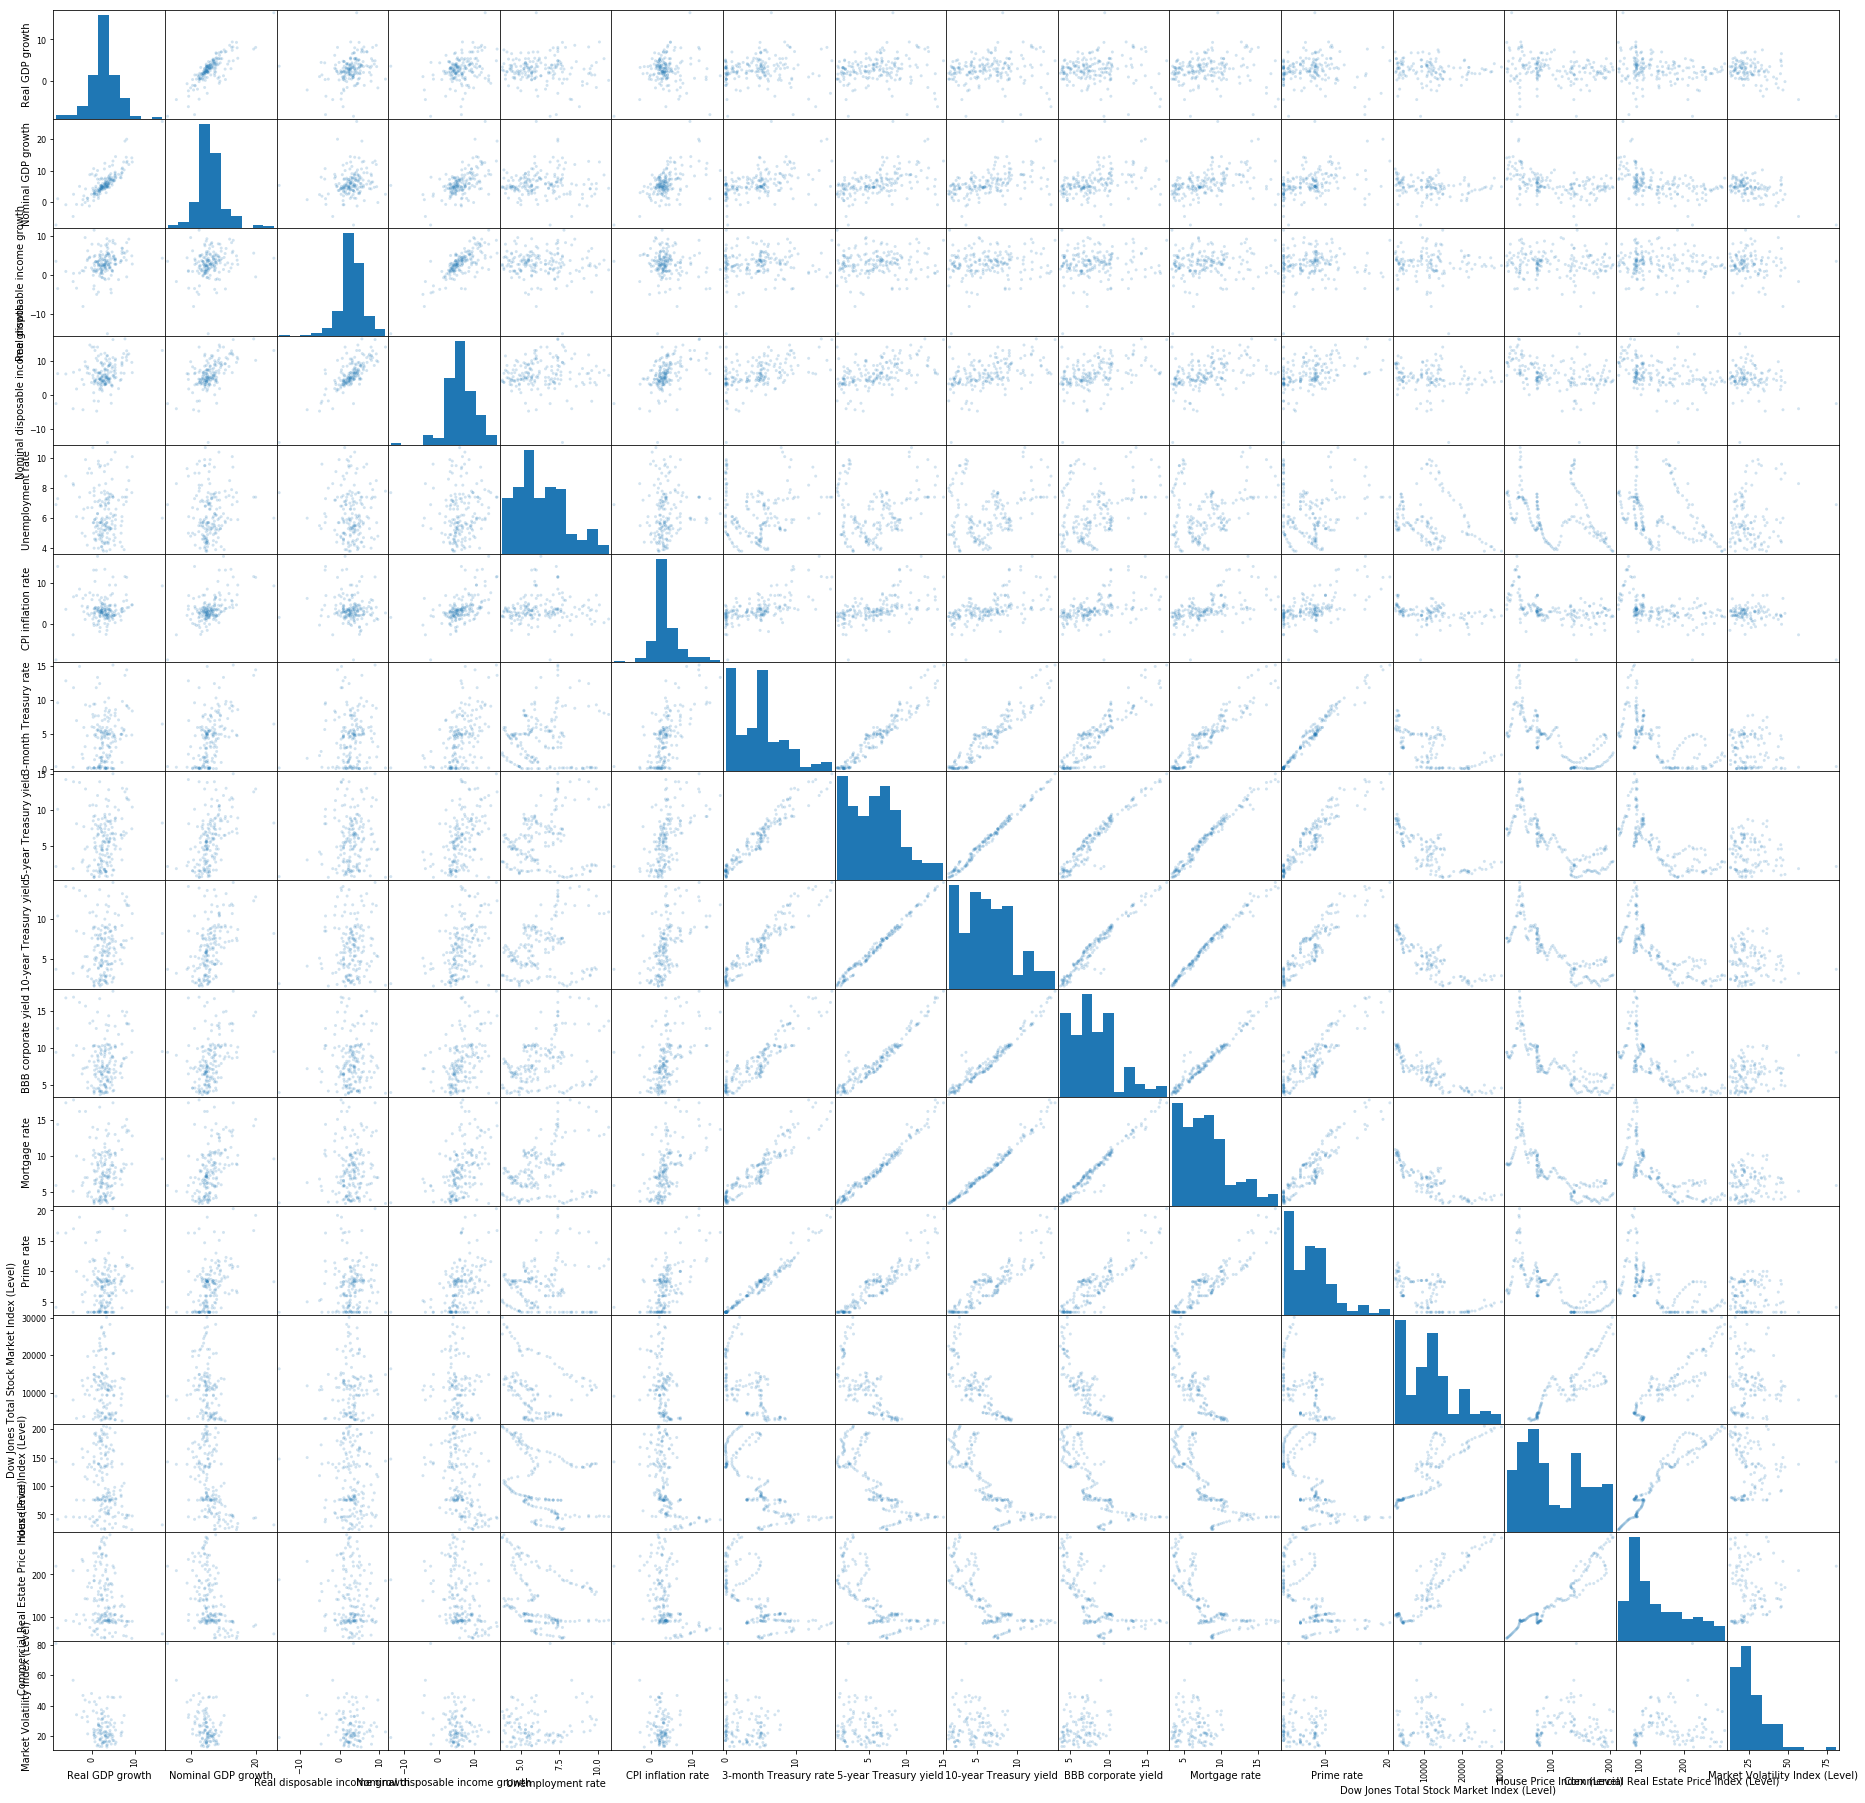

In [17]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(historical_data_dom, alpha=0.2, figsize=(32, 32));

In [18]:
# convert historical data's quarterly dates to YYYY-MM-DD format

prng = pd.period_range('1976Q1', '2018Q4', freq='Q-DEC')
historical_data_dom.index = (prng.asfreq('D', 'e'))

### Calculate log returns and quarterly data for each stock

In [19]:
import statsmodels.api as sm

# log returns
slv['Log_Ret'] = np.log(slv['Adj Close']/slv['Adj Close'].shift(1))
t['Log_Ret'] = np.log(t['Adj Close']/t['Adj Close'].shift(1))
bep['Log_Ret'] = np.log(bep['Adj Close']/bep['Adj Close'].shift(1))
terp['Log_Ret'] = np.log(terp['Adj Close']/terp['Adj Close'].shift(1))
mfc['Log_Ret'] = np.log(mfc['Adj Close']/mfc['Adj Close'].shift(1))
jpm['Log_Ret'] = np.log(jpm['Adj Close']/jpm['Adj Close'].shift(1))
voya['Log_Ret'] = np.log(voya['Adj Close']/voya['Adj Close'].shift(1))
qqq['Log_Ret'] = np.log(qqq['Adj Close']/qqq['Adj Close'].shift(1))
aapl['Log_Ret'] = np.log(aapl['Adj Close']/aapl['Adj Close'].shift(1))
baba['Log_Ret'] = np.log(baba['Adj Close']/baba['Adj Close'].shift(1))
spy['Log_Ret'] = np.log(spy['Adj Close']/spy['Adj Close'].shift(1))
gld['Log_Ret'] = np.log(gld['Adj Close']/gld['Adj Close'].shift(1))
twtr['Log_Ret'] = np.log(twtr['Adj Close']/twtr['Adj Close'].shift(1))
msft['Log_Ret'] = np.log(msft['Adj Close']/msft['Adj Close'].shift(1))
cmcsa['Log_Ret'] = np.log(cmcsa['Adj Close']/cmcsa['Adj Close'].shift(1))
xle['Log_Ret'] = np.log(xle['Adj Close']/xle['Adj Close'].shift(1))

# quarterly data
quarterly_slv = slv.resample('q').mean()
quarterly_t = t.resample('q').mean()
quarterly_bep = bep.resample('q').mean()
quarterly_terp = terp.resample('q').mean()
quarterly_mfc = mfc.resample('q').mean()
quarterly_jpm = jpm.resample('q').mean()
quarterly_voya = voya.resample('q').mean()
quarterly_qqq = qqq.resample('q').mean()
quarterly_aapl = aapl.resample('q').mean()
quarterly_baba = baba.resample('q').mean()
quarterly_spy = spy.resample('q').mean()
quarterly_gld = gld.resample('q').mean()
quarterly_twtr = twtr.resample('q').mean()
quarterly_msft = msft.resample('q').mean()
quarterly_cmcsa = cmcsa.resample('q').mean()
quarterly_xle = xle.resample('q').mean()

### Linear regression for our stocks

#### SLV

In [20]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['2006-06-30':'2018-12-31']
dfy = quarterly_slv['Adj Close']['2006-06-30':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_slv = sm.OLS(y, X).fit()

est_slv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     10.33
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           2.45e-05
Time:                        20:44:40   Log-Likelihood:                -157.32
No. Observations:                  51   AIC:                             322.6
Df Residuals:                      47   BIC:                             330.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -6.8148      6.237     -1.093      0.280     -19.363       5.733
Unemployment rate                              2.8244      0.538      5.251      0.000       1.742       3.906
Dow Jones Total Stock Market Index (Level)     0.0004      0.000      2.277      0.027    5.07e-05       0.001
Real disposable income growth                 -0.0009      0.200     -0.005      0.996      -0.402       0.401
==============================================================================
Omnibus:                        2.911   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                1.942
Skew:                           0.416   Prob(JB):                        0.379
Kurtosis:                       3.472   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### T

In [21]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['1998-12-31':'2018-12-31']
dfy = quarterly_t['Adj Close']['1998-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_t = sm.OLS(y, X).fit()

est_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     118.7
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           8.42e-29
Time:                        20:44:40   Log-Likelihood:                -203.42
No. Observations:                  81   AIC:                             414.8
Df Residuals:                      77   BIC:                             424.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0245      1.873     -0.013      0.990      -3.754       3.705
Unemployment rate                              0.3116      0.205      1.517      0.133      -0.097       0.721
Dow Jones Total Stock Market Index (Level)     0.0012   6.62e-05     18.251      0.000       0.001       0.001
Real disposable income growth                 -0.0682      0.091     -0.748      0.457      -0.250       0.113
==============================================================================
Omnibus:                        1.159   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.010
Skew:                          -0.013   Prob(JB):                        0.604
Kurtosis:                       2.454   Cond. No.                     8.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### BEP

In [22]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['2005-12-31':'2018-12-31']
dfy = quarterly_bep['Adj Close']['2005-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_bep = sm.OLS(y, X).fit()

est_bep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     257.3
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           5.63e-30
Time:                        20:44:40   Log-Likelihood:                -107.54
No. Observations:                  53   AIC:                             223.1
Df Residuals:                      49   BIC:                             231.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -20.3166      2.008    -10.117      0.000     -24.352     -16.281
Unemployment rate                              1.4217      0.176      8.063      0.000       1.067       1.776
Dow Jones Total Stock Market Index (Level)     0.0016    6.2e-05     25.444      0.000       0.001       0.002
Real disposable income growth                 -0.0276      0.067     -0.410      0.684      -0.163       0.108
==============================================================================
Omnibus:                        2.408   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.446
Skew:                           0.081   Prob(JB):                        0.485
Kurtosis:                       2.207   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### TERP

In [23]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['2014-09-30':'2018-12-31']
dfy = quarterly_terp['Adj Close']['2014-09-30':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_terp = sm.OLS(y, X).fit()

est_terp.summary()

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     6.841
Date:                Thu, 14 Nov 2019   Prob (F-statistic):            0.00455
Time:                        20:44:40   Log-Likelihood:                -49.381
No. Observations:                  18   AIC:                             106.8
Df Residuals:                      14   BIC:                             110.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -44.1129     34.715     -1.271      0.225    -118.569      30.343
Unemployment rate                              7.8623      3.821      2.058      0.059      -0.333      16.058
Dow Jones Total Stock Market Index (Level)     0.0007      0.001      0.880      0.394      -0.001       0.002
Real disposable income growth                  1.2048      0.839      1.436      0.173      -0.595       3.005
==============================================================================
Omnibus:                        7.338   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                4.468
Skew:                           1.066   Prob(JB):                        0.107
Kurtosis:                       4.189   Cond. No.                     8.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### MFC

In [24]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['1999-09-30':'2018-12-31']
dfy = quarterly_mfc['Adj Close']['1999-09-30':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_mfc = sm.OLS(y, X).fit()

est_mfc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     5.079
Date:                Thu, 14 Nov 2019   Prob (F-statistic):            0.00298
Time:                        20:44:40   Log-Likelihood:                -234.38
No. Observations:                  78   AIC:                             476.8
Df Residuals:                      74   BIC:                             486.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          9.2177      3.199      2.882      0.005       2.844      15.592
Unemployment rate                             -0.1827      0.346     -0.528      0.599      -0.872       0.506
Dow Jones Total Stock Market Index (Level)     0.0004      0.000      3.289      0.002       0.000       0.001
Real disposable income growth                 -0.1823      0.150     -1.218      0.227      -0.481       0.116
==============================================================================
Omnibus:                        8.405   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.953
Skew:                           0.740   Prob(JB):                       0.0188
Kurtosis:                       3.508   Cond. No.                     9.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### JPM

In [25]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['1998-12-31':'2018-12-31']
dfy = quarterly_jpm['Adj Close']['1998-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_jpm = sm.OLS(y, X).fit()

est_jpm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     257.1
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           5.14e-40
Time:                        20:44:41   Log-Likelihood:                -268.89
No. Observations:                  81   AIC:                             545.8
Df Residuals:                      77   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -20.0789      4.203     -4.777      0.000     -28.448     -11.709
Unemployment rate                              0.1177      0.461      0.255      0.799      -0.800       1.036
Dow Jones Total Stock Market Index (Level)     0.0039      0.000     26.284      0.000       0.004       0.004
Real disposable income growth                 -0.0648      0.204     -0.317      0.752      -0.472       0.342
==============================================================================
Omnibus:                       11.813   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.245
Skew:                           0.751   Prob(JB):                      0.00133
Kurtosis:                       4.292   Cond. No.                     8.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### VOYA

In [26]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['2013-06-30':'2018-12-31']
dfy = quarterly_voya['Adj Close']['2013-06-30':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_voya = sm.OLS(y, X).fit()

est_voya.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     10.16
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           0.000328
Time:                        20:44:41   Log-Likelihood:                -66.811
No. Observations:                  23   AIC:                             141.6
Df Residuals:                      19   BIC:                             146.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         11.9513     25.877      0.462      0.649     -42.211      66.113
Unemployment rate                             -1.2054      2.207     -0.546      0.591      -5.825       3.415
Dow Jones Total Stock Market Index (Level)     0.0012      0.001      1.810      0.086      -0.000       0.003
Real disposable income growth                  1.5584      0.689      2.261      0.036       0.116       3.001
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.505
Skew:                           0.154   Prob(JB):                        0.777
Kurtosis:                       2.343   Cond. No.                     5.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### QQQ

In [27]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['1999-03-31':'2018-12-31']
dfy = quarterly_qqq['Adj Close']['1999-03-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_qqq = sm.OLS(y, X).fit()

est_qqq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     294.5
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           9.65e-42
Time:                        20:44:41   Log-Likelihood:                -305.05
No. Observations:                  80   AIC:                             618.1
Df Residuals:                      76   BIC:                             627.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -36.3069      6.979     -5.202      0.000     -50.208     -22.406
Unemployment rate                             -0.5987      0.762     -0.786      0.434      -2.115       0.918
Dow Jones Total Stock Market Index (Level)     0.0068      0.000     27.598      0.000       0.006       0.007
Real disposable income growth                  0.3145      0.335      0.938      0.351      -0.353       0.982
==============================================================================
Omnibus:                        3.974   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.179
Skew:                           0.432   Prob(JB):                        0.204
Kurtosis:                       3.455   Cond. No.                     8.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### AAPL

In [28]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['1998-12-31':'2018-12-31']
dfy = quarterly_aapl['Adj Close']['1998-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_aapl = sm.OLS(y, X).fit()

est_aapl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     307.0
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           9.93e-43
Time:                        20:44:41   Log-Likelihood:                -332.91
No. Observations:                  81   AIC:                             673.8
Df Residuals:                      77   BIC:                             683.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       -141.9717      9.265    -15.323      0.000    -160.421    -123.523
Unemployment rate                              6.4643      1.016      6.361      0.000       4.441       8.488
Dow Jones Total Stock Market Index (Level)     0.0099      0.000     30.105      0.000       0.009       0.011
Real disposable income growth                  0.0256      0.451      0.057      0.955      -0.872       0.923
==============================================================================
Omnibus:                        8.948   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.814
Skew:                           0.665   Prob(JB):                       0.0122
Kurtosis:                       3.919   Cond. No.                     8.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### BABA

In [29]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['2014-09-30':'2018-12-31']
dfy = quarterly_baba['Adj Close']['2014-09-30':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_baba = sm.OLS(y, X).fit()

est_baba.summary()

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     41.92
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           3.04e-07
Time:                        20:44:41   Log-Likelihood:                -72.172
No. Observations:                  18   AIC:                             152.3
Df Residuals:                      14   BIC:                             155.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       -262.8440    123.137     -2.135      0.051    -526.947       1.259
Unemployment rate                              6.0285     13.554      0.445      0.663     -23.041      35.098
Dow Jones Total Stock Market Index (Level)     0.0145      0.003      5.233      0.000       0.009       0.020
Real disposable income growth                  2.1514      2.976      0.723      0.482      -4.232       8.535
==============================================================================
Omnibus:                        1.604   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.238
Skew:                          -0.603   Prob(JB):                        0.539
Kurtosis:                       2.558   Cond. No.                     8.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### SPY

In [30]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['1998-12-31':'2018-12-31']
dfy = quarterly_spy['Adj Close']['1998-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_spy = sm.OLS(y, X).fit()

est_spy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1347.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           2.06e-66
Time:                        20:44:41   Log-Likelihood:                -279.43
No. Observations:                  81   AIC:                             566.9
Df Residuals:                      77   BIC:                             576.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -33.3040      4.788     -6.956      0.000     -42.838     -23.770
Unemployment rate                              0.6808      0.525      1.296      0.199      -0.365       1.727
Dow Jones Total Stock Market Index (Level)     0.0102      0.000     60.375      0.000       0.010       0.011
Real disposable income growth                 -0.0799      0.233     -0.343      0.732      -0.544       0.384
==============================================================================
Omnibus:                       24.605   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.735
Skew:                           1.113   Prob(JB):                     7.11e-11
Kurtosis:                       5.983   Cond. No.                     8.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### GLD

In [31]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['2004-12-31':'2018-12-31']
dfy = quarterly_gld['Adj Close']['2004-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_gld = sm.OLS(y, X).fit()

est_gld.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     47.71
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           4.42e-15
Time:                        20:44:41   Log-Likelihood:                -244.91
No. Observations:                  57   AIC:                             497.8
Df Residuals:                      53   BIC:                             506.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -94.3259     17.128     -5.507      0.000    -128.680     -59.972
Unemployment rate                             17.4384      1.572     11.090      0.000      14.284      20.592
Dow Jones Total Stock Market Index (Level)     0.0055      0.001     10.114      0.000       0.004       0.007
Real disposable income growth                 -0.0501      0.626     -0.080      0.937      -1.306       1.206
==============================================================================
Omnibus:                        2.717   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                1.927
Skew:                           0.426   Prob(JB):                        0.382
Kurtosis:                       3.292   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### TWTR

In [32]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['2013-12-31':'2018-12-31']
dfy = quarterly_twtr['Adj Close']['2013-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_twtr = sm.OLS(y, X).fit()

est_twtr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     10.56
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           0.000372
Time:                        20:44:41   Log-Likelihood:                -71.367
No. Observations:                  21   AIC:                             150.7
Df Residuals:                      17   BIC:                             154.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       -117.3087     45.680     -2.568      0.020    -213.684     -20.933
Unemployment rate                             15.8927      4.298      3.698      0.002       6.826      24.960
Dow Jones Total Stock Market Index (Level)     0.0027      0.001      2.338      0.032       0.000       0.005
Real disposable income growth                  1.7808      1.250      1.425      0.172      -0.856       4.418
==============================================================================
Omnibus:                        1.179   Durbin-Watson:                   0.631
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                0.820
Skew:                          -0.016   Prob(JB):                        0.664
Kurtosis:                       2.032   Cond. No.                     6.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### MSFT

In [33]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['1998-12-31':'2018-12-31']
dfy = quarterly_msft['Adj Close']['1998-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_msft = sm.OLS(y, X).fit()

est_msft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     133.6
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.96e-30
Time:                        20:44:41   Log-Likelihood:                -285.61
No. Observations:                  81   AIC:                             579.2
Df Residuals:                      77   BIC:                             588.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -13.6135      5.167     -2.635      0.010     -23.902      -3.325
Unemployment rate                             -0.9760      0.567     -1.722      0.089      -2.105       0.152
Dow Jones Total Stock Market Index (Level)     0.0033      0.000     18.227      0.000       0.003       0.004
Real disposable income growth                  0.0292      0.251      0.116      0.908      -0.471       0.530
==============================================================================
Omnibus:                       33.287   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.196
Skew:                           1.366   Prob(JB):                     3.16e-19
Kurtosis:                       7.217   Cond. No.                     8.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CMCSA

In [34]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['1998-12-31':'2018-12-31']
dfy = quarterly_cmcsa['Adj Close']['1998-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_cmcsa = sm.OLS(y, X).fit()

est_cmcsa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     312.8
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           5.12e-43
Time:                        20:44:41   Log-Likelihood:                -194.45
No. Observations:                  81   AIC:                             396.9
Df Residuals:                      77   BIC:                             406.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -10.6410      1.677     -6.346      0.000     -13.980      -7.302
Unemployment rate                             -0.0476      0.184     -0.259      0.797      -0.414       0.319
Dow Jones Total Stock Market Index (Level)     0.0017   5.92e-05     28.802      0.000       0.002       0.002
Real disposable income growth                 -0.0034      0.082     -0.041      0.967      -0.166       0.159
==============================================================================
Omnibus:                        1.337   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.212
Skew:                          -0.142   Prob(JB):                        0.546
Kurtosis:                       2.473   Cond. No.                     8.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### XLE

In [35]:
dfx = historical_data_dom[['Unemployment rate', 'Real GDP growth', 'House Price Index (Level)', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]['1998-12-31':'2018-12-31']
dfy = quarterly_xle['Adj Close']['1998-12-31':'2018-12-31']
dfx.index=dfy.index
result = pd.concat([dfx,dfy], axis=1)
X = result[['Unemployment rate', 'Dow Jones Total Stock Market Index (Level)', 'Real disposable income growth']]
y = result['Adj Close']
X = sm.add_constant(X)
est_xle = sm.OLS(y, X).fit()

est_xle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     88.77
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           6.34e-25
Time:                        20:44:41   Log-Likelihood:                -297.04
No. Observations:                  81   AIC:                             602.1
Df Residuals:                      77   BIC:                             611.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -37.6257      5.950     -6.323      0.000     -49.475     -25.777
Unemployment rate                              5.4617      0.653      8.368      0.000       4.162       6.761
Dow Jones Total Stock Market Index (Level)     0.0033      0.000     15.932      0.000       0.003       0.004
Real disposable income growth                 -0.1926      0.289     -0.665      0.508      -0.769       0.384
==============================================================================
Omnibus:                        9.724   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.798
Skew:                           0.835   Prob(JB):                      0.00746
Kurtosis:                       3.337   Cond. No.                     8.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Import baseline, adverse and severely adverse future scenarios from Federal Reserve

In [38]:
base_future = pd.read_csv('C:/Users/Yean Keat/Documents/BT4016/Project/2019-macro-scenario-tables/Table_2A_Supervisory_Baseline_Domestic.csv', date_parser=pd.Period)
base_future.set_index('Date')
ad_future = pd.read_csv('C:/Users/Yean Keat/Documents/BT4016/Project/2019-macro-scenario-tables/Table_3A_Supervisory_Adverse_Domestic.csv', date_parser=pd.Period)
ad_future.set_index('Date');
sev_ad_future = pd.read_csv('C:/Users/Yean Keat/Documents/BT4016/Project/2019-macro-scenario-tables/Table_4A_Supervisory_Severely_Adverse_Domestic.csv', date_parser=pd.Period)
sev_ad_future.set_index('Date');

### Stress-testing against the future scenarios from the Federal Reserve's CCAR files

#### SLV

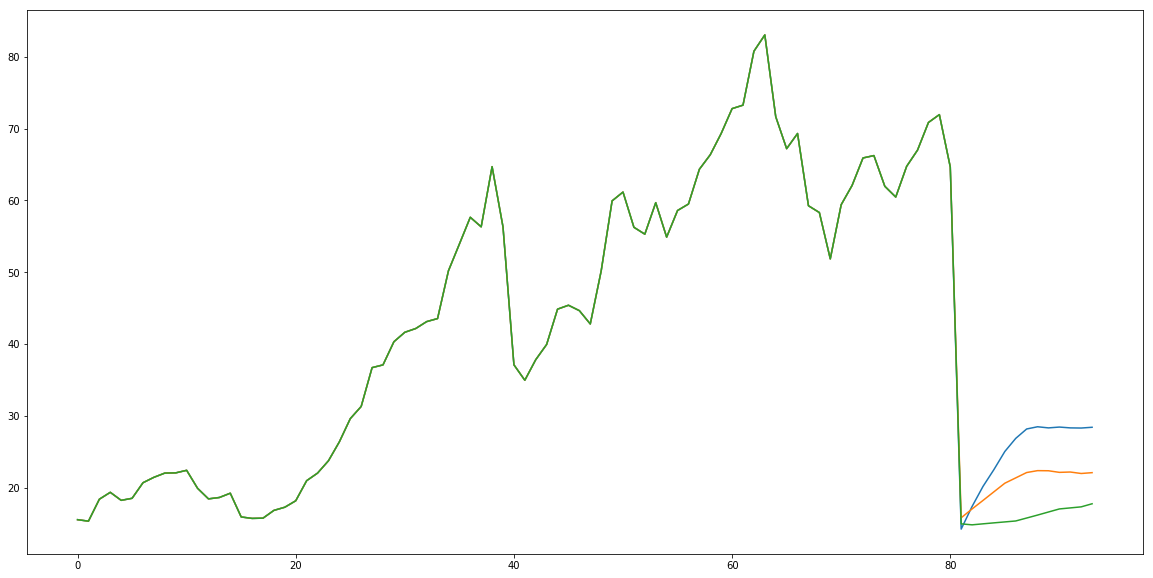

In [40]:
slv_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
slv_sev_x = sm.add_constant(slv_sev_x) # add constants
slv_sev_ad_y = est_slv.predict(slv_sev_x)
slv_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
slv_ad_x = sm.add_constant(slv_ad_x) # add constants
slv_ad_y = est_slv.predict(slv_ad_x)
slv_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
slv_base_x = sm.add_constant(slv_base_x) # add constants
slv_base_y = est_slv.predict(slv_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, slv_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, slv_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, slv_base_y))); #no drop for baseline scenario

#### T

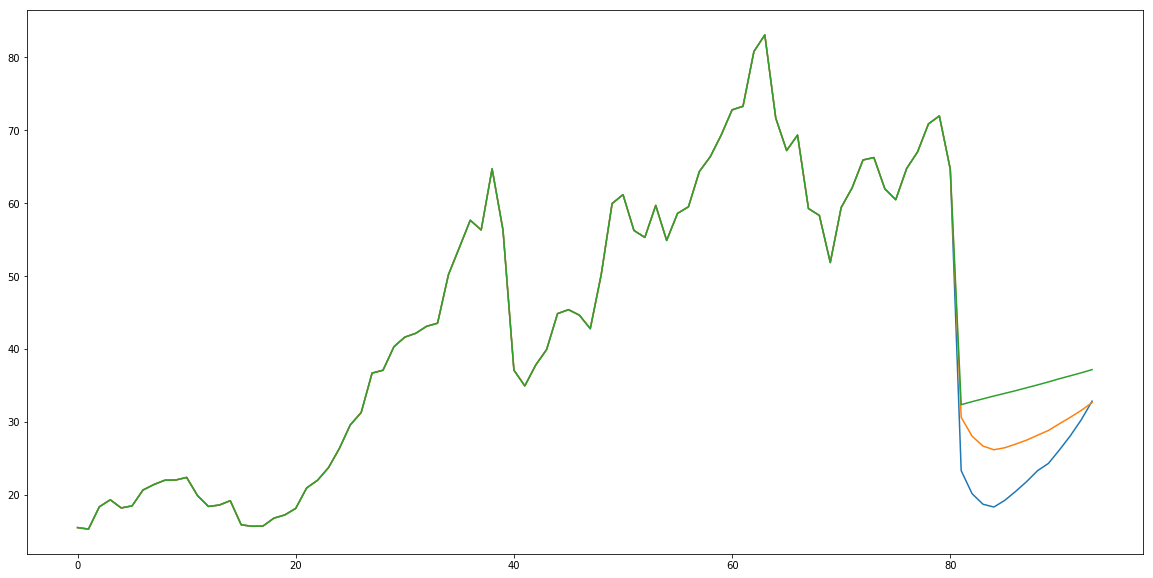

In [41]:
t_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
t_sev_x = sm.add_constant(t_sev_x) # add constants
t_sev_ad_y = est_t.predict(t_sev_x)
t_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
t_ad_x = sm.add_constant(t_ad_x) # add constants
t_ad_y = est_t.predict(t_ad_x)
t_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
t_base_x = sm.add_constant(t_base_x) # add constants
t_base_y = est_t.predict(t_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, t_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, t_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, t_base_y))); #no drop for baseline scenario

#### BEP

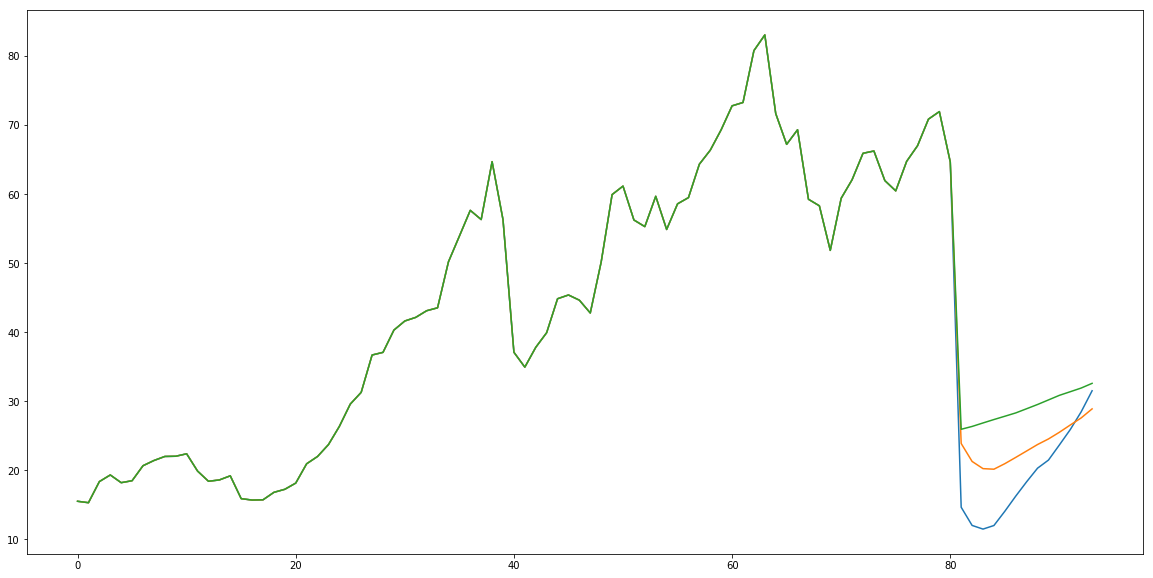

In [42]:
bep_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
bep_sev_x = sm.add_constant(bep_sev_x) # add constants
bep_sev_ad_y = est_bep.predict(bep_sev_x)
bep_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
bep_ad_x = sm.add_constant(bep_ad_x) # add constants
bep_ad_y = est_bep.predict(bep_ad_x)
bep_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
bep_base_x = sm.add_constant(bep_base_x) # add constants
bep_base_y = est_bep.predict(bep_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, bep_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, bep_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, bep_base_y))); #no drop for baseline scenario

#### TERP

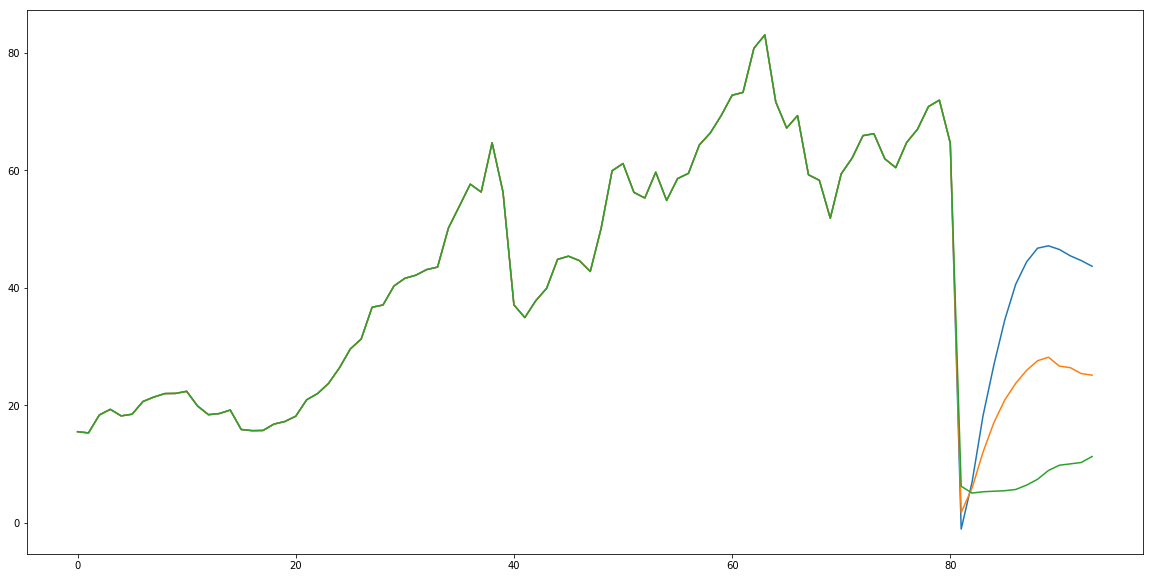

In [43]:
terp_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
terp_sev_x = sm.add_constant(terp_sev_x) # add constants
terp_sev_ad_y = est_terp.predict(terp_sev_x)
terp_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
terp_ad_x = sm.add_constant(terp_ad_x) # add constants
terp_ad_y = est_terp.predict(terp_ad_x)
terp_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
terp_base_x = sm.add_constant(terp_base_x) # add constants
terp_base_y = est_terp.predict(terp_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, terp_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, terp_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, terp_base_y))); #no drop for baseline scenario

#### MFC

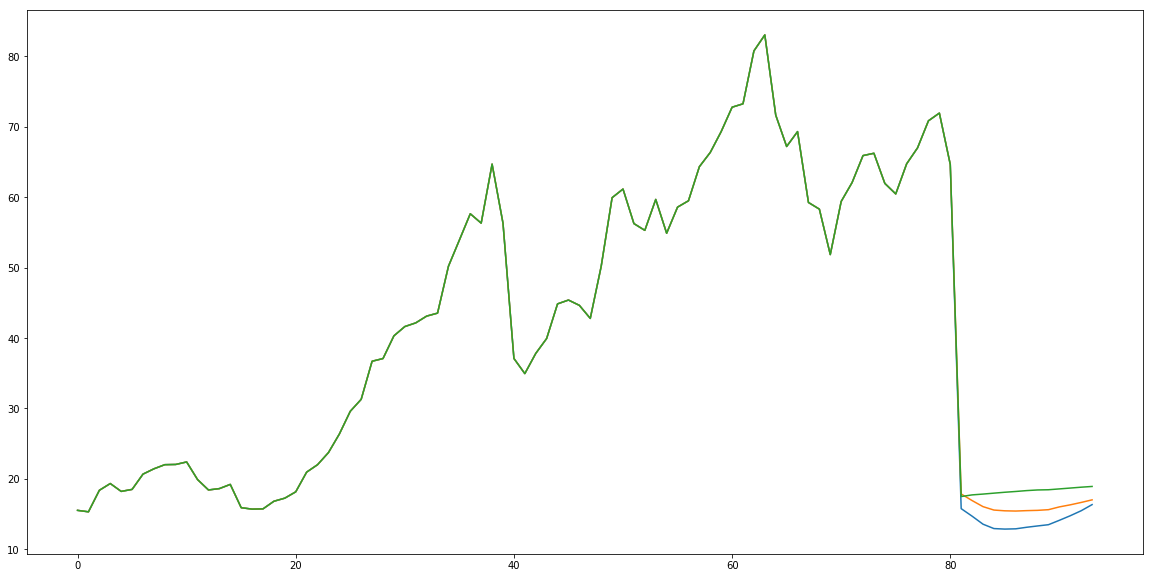

In [44]:
mfc_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
mfc_sev_x = sm.add_constant(mfc_sev_x) # add constants
mfc_sev_ad_y = est_mfc.predict(mfc_sev_x)
mfc_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
mfc_ad_x = sm.add_constant(mfc_ad_x) # add constants
mfc_ad_y = est_mfc.predict(mfc_ad_x)
mfc_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
mfc_base_x = sm.add_constant(mfc_base_x) # add constants
mfc_base_y = est_mfc.predict(mfc_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, mfc_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, mfc_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, mfc_base_y))); #no drop for baseline scenario

#### JPM

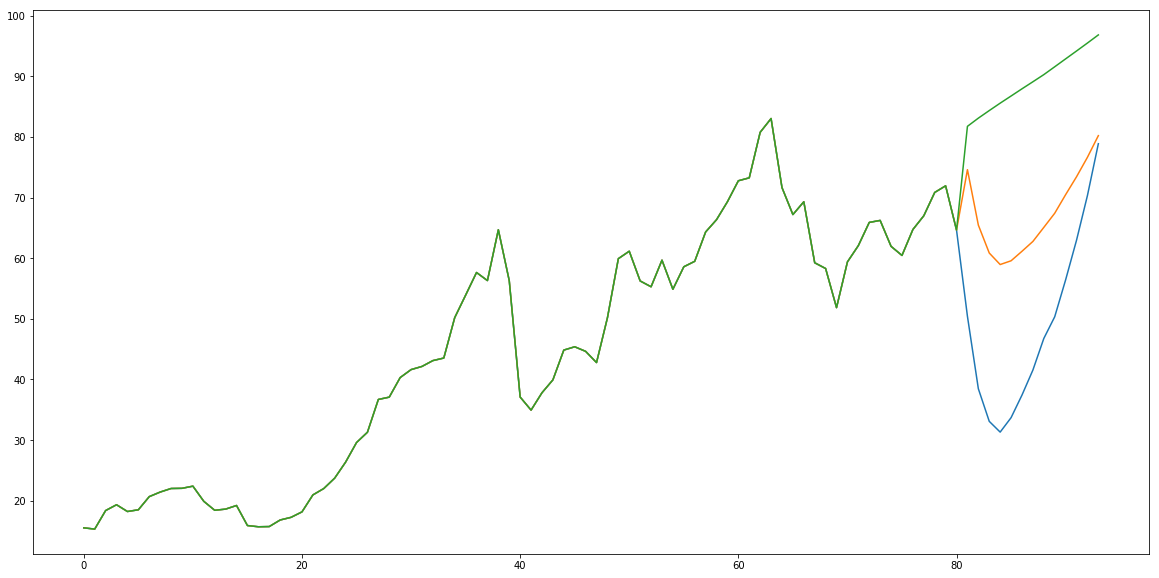

In [45]:
jpm_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
jpm_sev_x = sm.add_constant(jpm_sev_x) # add constants
jpm_sev_ad_y = est_jpm.predict(jpm_sev_x)
jpm_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
jpm_ad_x = sm.add_constant(jpm_ad_x) # add constants
jpm_ad_y = est_jpm.predict(jpm_ad_x)
jpm_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
jpm_base_x = sm.add_constant(jpm_base_x) # add constants
jpm_base_y = est_jpm.predict(jpm_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, jpm_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, jpm_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, jpm_base_y))); #no drop for baseline scenario

#### VOYA

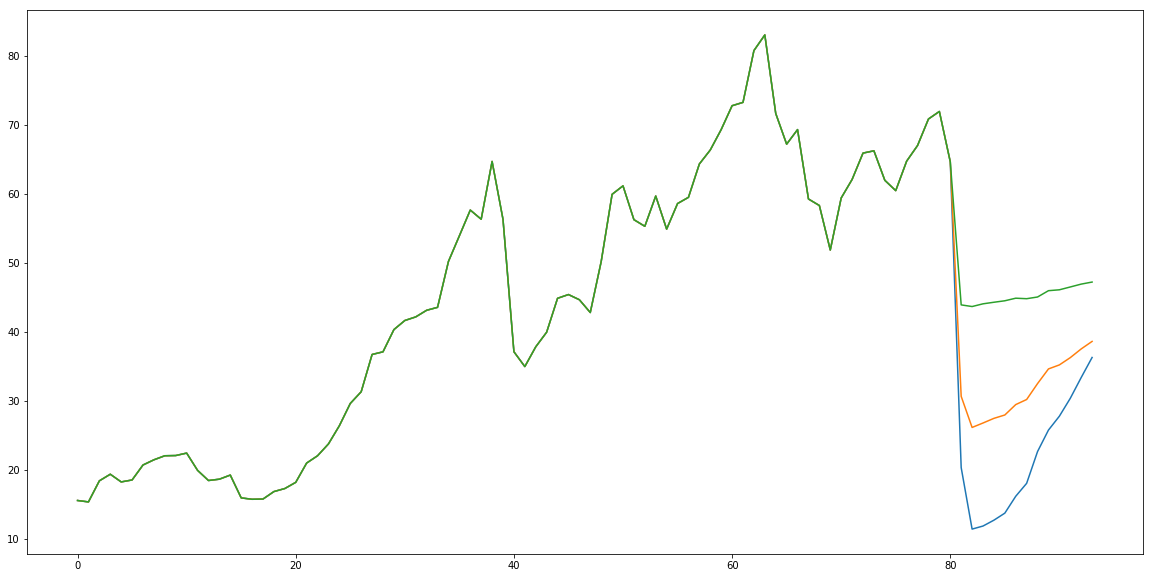

In [46]:
voya_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
voya_sev_x = sm.add_constant(voya_sev_x) # add constants
voya_sev_ad_y = est_voya.predict(voya_sev_x)
voya_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
voya_ad_x = sm.add_constant(voya_ad_x) # add constants
voya_ad_y = est_voya.predict(voya_ad_x)
voya_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
voya_base_x = sm.add_constant(voya_base_x) # add constants
voya_base_y = est_voya.predict(voya_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, voya_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, voya_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, voya_base_y))); #no drop for baseline scenario

#### QQQ

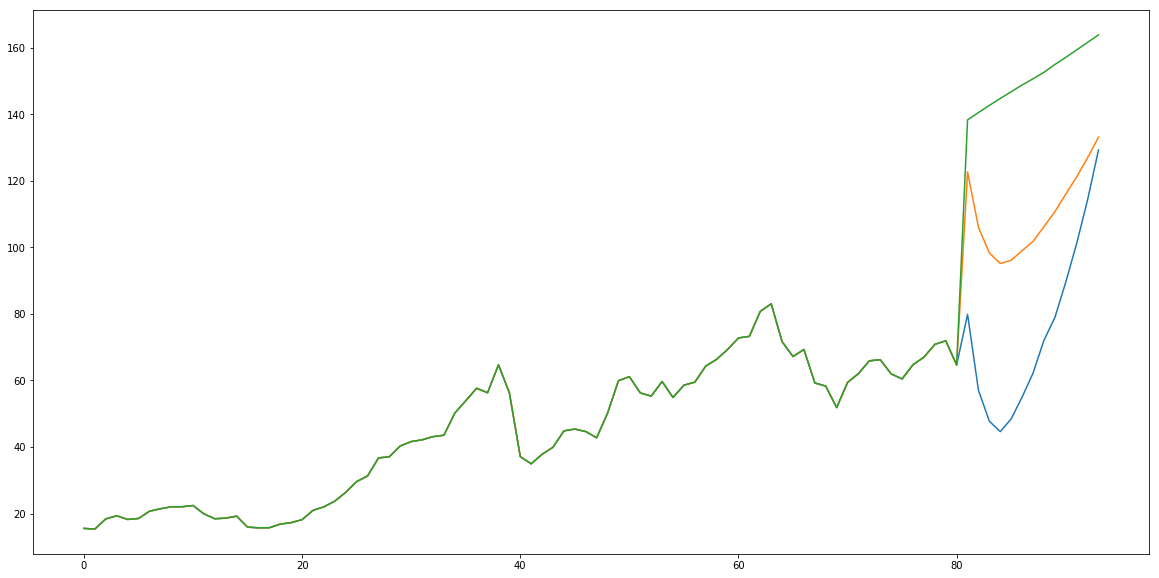

In [47]:
qqq_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
qqq_sev_x = sm.add_constant(qqq_sev_x) # add constants
qqq_sev_ad_y = est_qqq.predict(qqq_sev_x)
qqq_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
qqq_ad_x = sm.add_constant(qqq_ad_x) # add constants
qqq_ad_y = est_qqq.predict(qqq_ad_x)
qqq_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
qqq_base_x = sm.add_constant(qqq_base_x) # add constants
qqq_base_y = est_qqq.predict(qqq_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, qqq_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, qqq_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, qqq_base_y))); #no drop for baseline scenario

#### AAPL

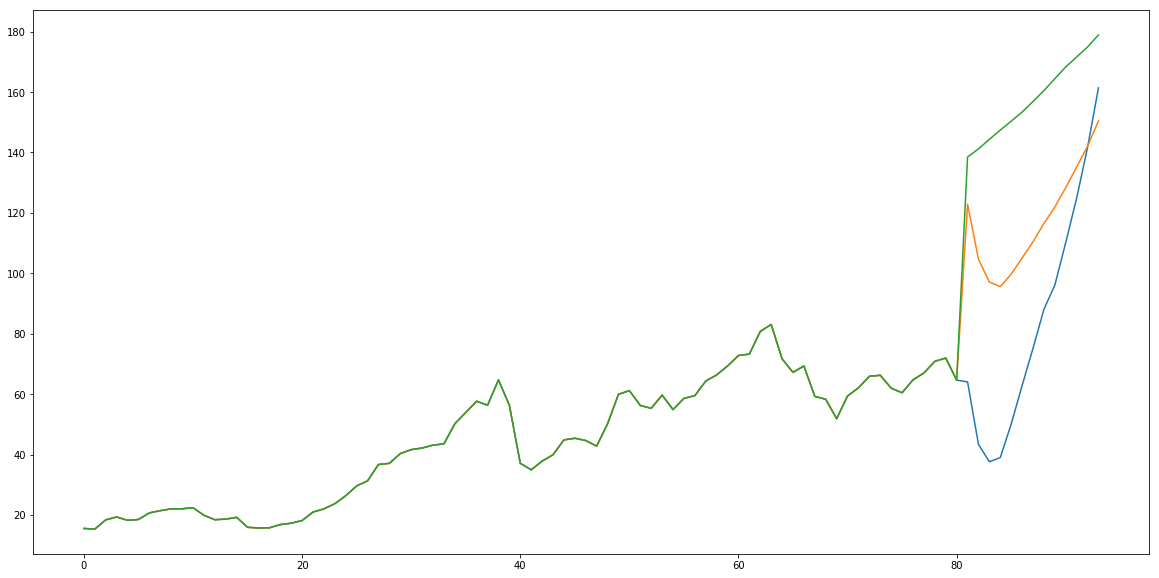

In [48]:
aapl_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
aapl_sev_x = sm.add_constant(aapl_sev_x) # add constants
aapl_sev_ad_y = est_aapl.predict(aapl_sev_x)
aapl_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
aapl_ad_x = sm.add_constant(aapl_ad_x) # add constants
aapl_ad_y = est_aapl.predict(aapl_ad_x)
aapl_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
aapl_base_x = sm.add_constant(aapl_base_x) # add constants
aapl_base_y = est_aapl.predict(aapl_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, aapl_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, aapl_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, aapl_base_y))); #no drop for baseline scenario

#### BABA

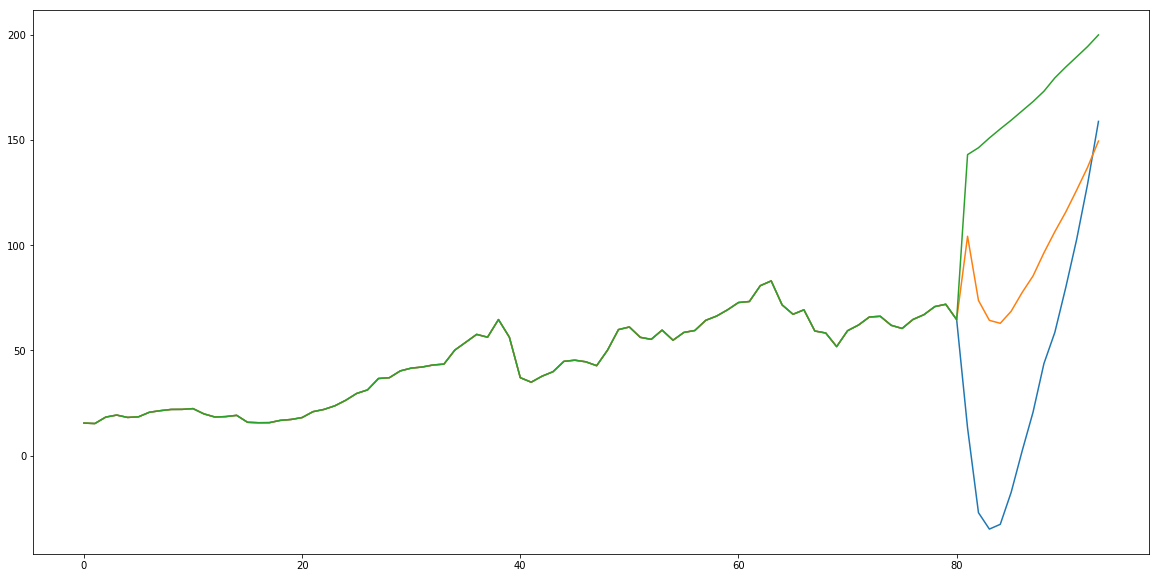

In [49]:
baba_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
baba_sev_x = sm.add_constant(baba_sev_x) # add constants
baba_sev_ad_y = est_baba.predict(baba_sev_x)
baba_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
baba_ad_x = sm.add_constant(baba_ad_x) # add constants
baba_ad_y = est_baba.predict(baba_ad_x)
baba_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
baba_base_x = sm.add_constant(baba_base_x) # add constants
baba_base_y = est_baba.predict(baba_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, baba_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, baba_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, baba_base_y))); #no drop for baseline scenario

#### SPY

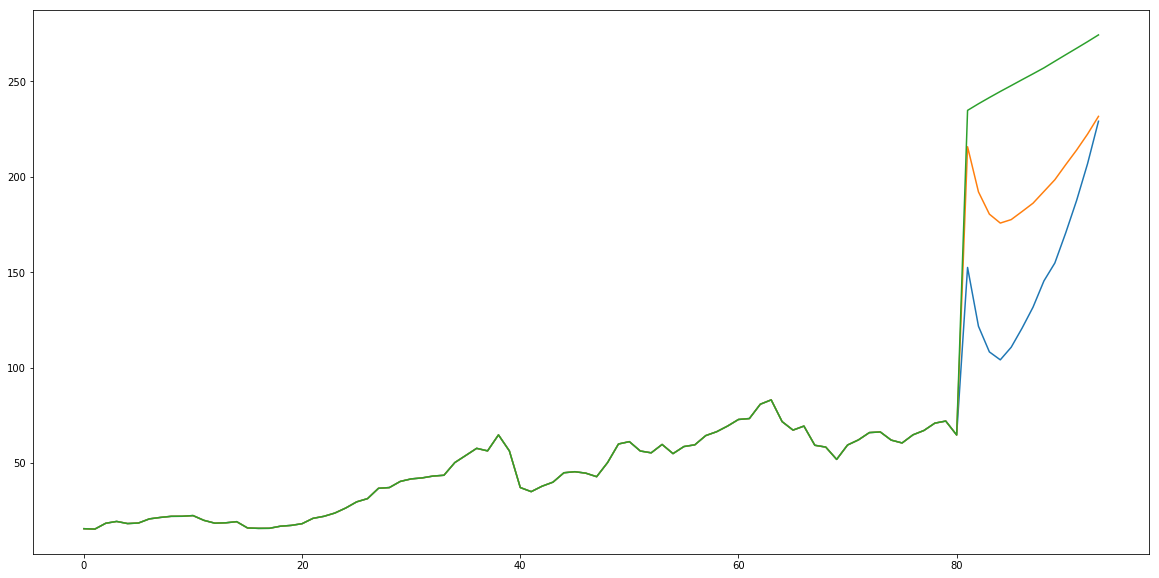

In [50]:
spy_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
spy_sev_x = sm.add_constant(spy_sev_x) # add constants
spy_sev_ad_y = est_spy.predict(spy_sev_x)
spy_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
spy_ad_x = sm.add_constant(spy_ad_x) # add constants
spy_ad_y = est_spy.predict(spy_ad_x)
spy_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
spy_base_x = sm.add_constant(spy_base_x) # add constants
spy_base_y = est_spy.predict(spy_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, spy_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, spy_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, spy_base_y))); #no drop for baseline scenario

#### GLD

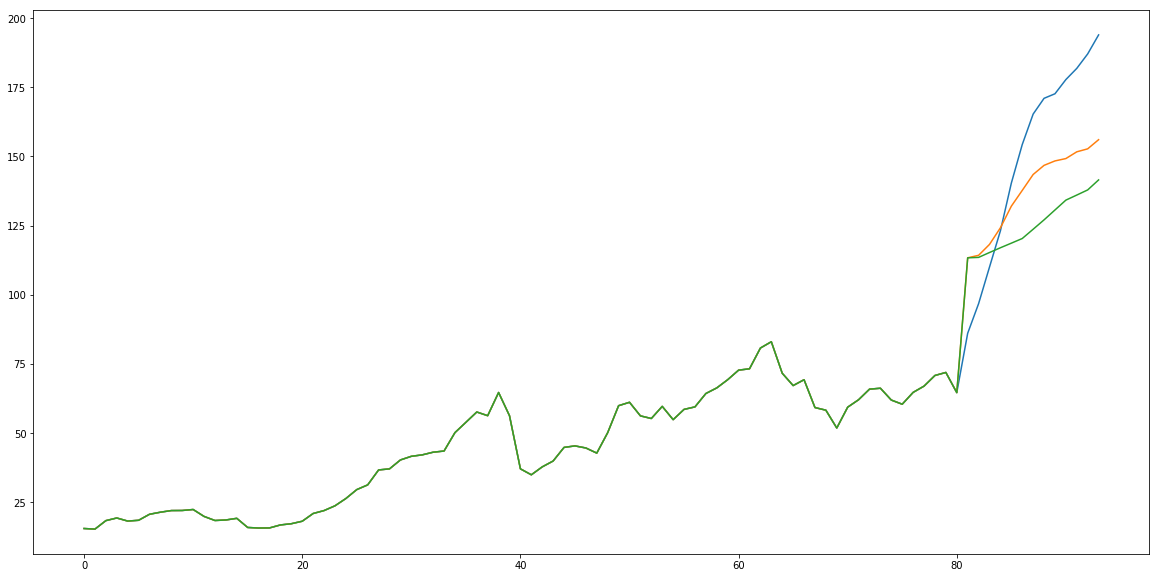

In [51]:
gld_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
gld_sev_x = sm.add_constant(gld_sev_x) # add constants
gld_sev_ad_y = est_gld.predict(gld_sev_x)
gld_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
gld_ad_x = sm.add_constant(gld_ad_x) # add constants
gld_ad_y = est_gld.predict(gld_ad_x)
gld_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
gld_base_x = sm.add_constant(gld_base_x) # add constants
gld_base_y = est_gld.predict(gld_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, gld_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, gld_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, gld_base_y))); #no drop for baseline scenario

#### TWTR

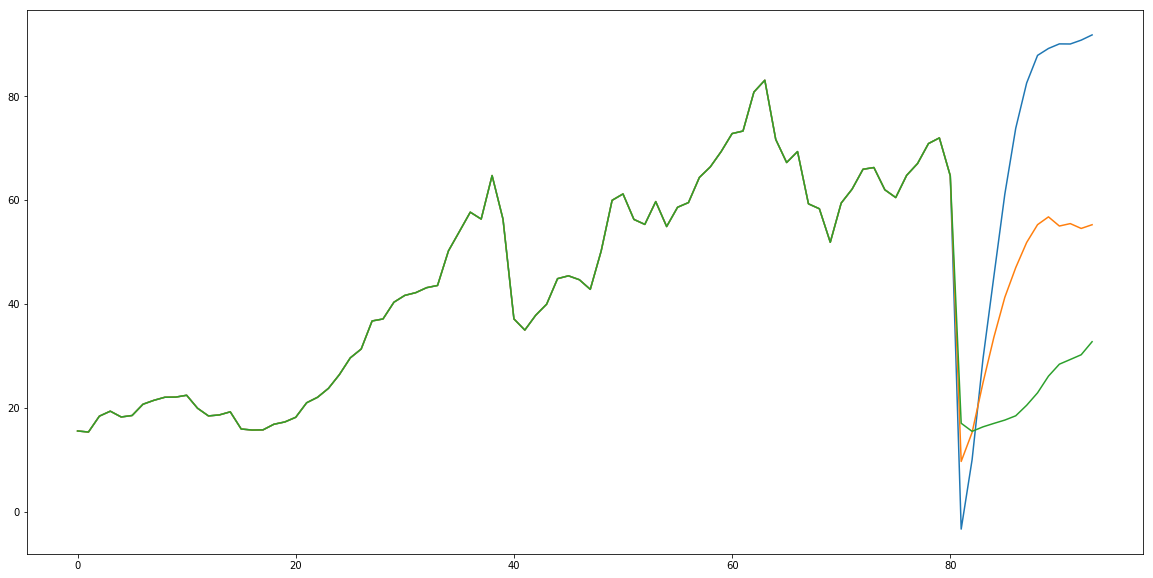

In [52]:
twtr_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
twtr_sev_x = sm.add_constant(twtr_sev_x) # add constants
twtr_sev_ad_y = est_twtr.predict(twtr_sev_x)
twtr_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
twtr_ad_x = sm.add_constant(twtr_ad_x) # add constants
twtr_ad_y = est_twtr.predict(twtr_ad_x)
twtr_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
twtr_base_x = sm.add_constant(twtr_base_x) # add constants
twtr_base_y = est_twtr.predict(twtr_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, twtr_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, twtr_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, twtr_base_y))); #no drop for baseline scenario

#### MSFT

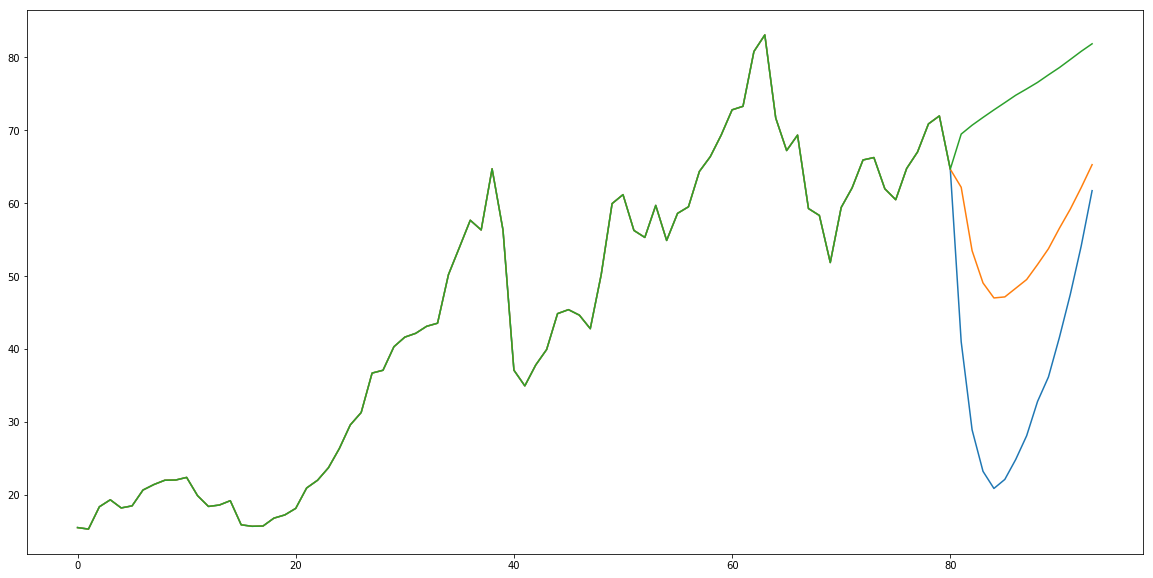

In [53]:
msft_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
msft_sev_x = sm.add_constant(msft_sev_x) # add constants
msft_sev_ad_y = est_msft.predict(msft_sev_x)
msft_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
msft_ad_x = sm.add_constant(msft_ad_x) # add constants
msft_ad_y = est_msft.predict(msft_ad_x)
msft_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
msft_base_x = sm.add_constant(msft_base_x) # add constants
msft_base_y = est_msft.predict(msft_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, msft_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, msft_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, msft_base_y))); #no drop for baseline scenario

#### CMCSA

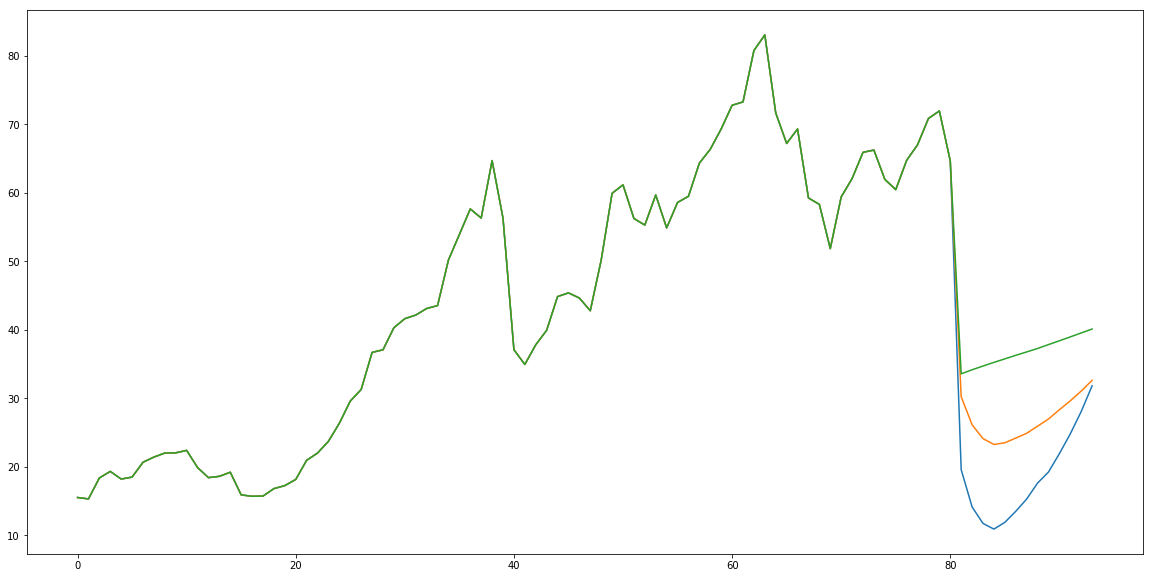

In [54]:
cmcsa_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
cmcsa_sev_x = sm.add_constant(cmcsa_sev_x) # add constants
cmcsa_sev_ad_y = est_cmcsa.predict(cmcsa_sev_x)
cmcsa_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
cmcsa_ad_x = sm.add_constant(cmcsa_ad_x) # add constants
cmcsa_ad_y = est_cmcsa.predict(cmcsa_ad_x)
cmcsa_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
cmcsa_base_x = sm.add_constant(cmcsa_base_x) # add constants
cmcsa_base_y = est_cmcsa.predict(cmcsa_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, cmcsa_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, cmcsa_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, cmcsa_base_y))); #no drop for baseline scenario

#### XLE

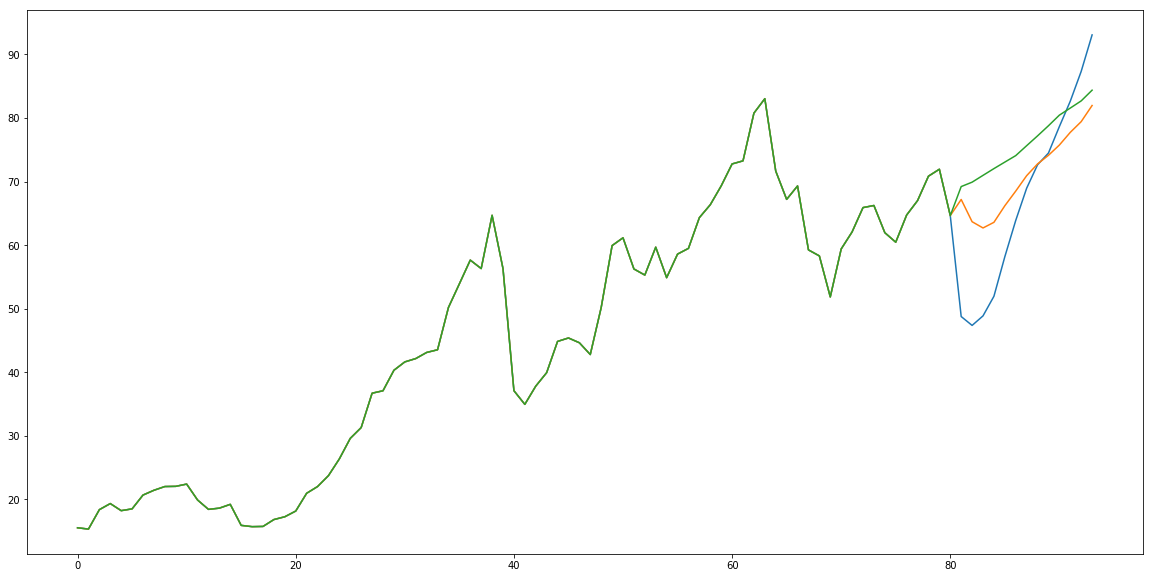

In [55]:
xle_sev_x = sev_ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
xle_sev_x = sm.add_constant(xle_sev_x) # add constants
xle_sev_ad_y = est_xle.predict(xle_sev_x)
xle_ad_x = ad_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
xle_ad_x = sm.add_constant(xle_ad_x) # add constants
xle_ad_y = est_xle.predict(xle_ad_x)
xle_base_x = base_future[['Unemployment rate',  'Dow Jones Total Stock Market Index (Level)','Real disposable income growth']]
xle_base_x = sm.add_constant(xle_base_x) # add constants
xle_base_y = est_xle.predict(xle_base_x)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.hstack((y, xle_sev_ad_y))); # big drop at the end under severely adverse
plt.plot(np.hstack((y, xle_ad_y))); #lesser drop for adverse
plt.plot(np.hstack((y, xle_base_y))); #no drop for baseline scenario